In [ ]:
options(repr.plot.width = 15, repr.plot.height = 10)


In [ ]:
# Load required libraries
library(ggplot2)
library(ggbump)
library(ggthemes)
library(dplyr)
library(tidyr)
library(scales)

# Race-by-race points earned (not cumulative) for Verstappen vs Norris 2024
# Based on race wins, podiums, and estimated finishing positions
race_points_data <- data.frame(
  race = rep(1:24, 2),
  grand_prix = rep(c(
    "Bahrain", "Saudi Arabia", "Australia", "Japan", "China",
    "Miami", "Emilia Romagna", "Monaco", "Canada", "Spain",
    "Austria", "British", "Hungarian", "Belgian", "Dutch",
    "Italian", "Azerbaijan", "Singapore", "United States",
    "Mexico", "Brazil", "Las Vegas", "Qatar", "Abu Dhabi"
  ), 2),
  driver = c(rep("Max Verstappen", 24), rep("Lando Norris", 24)),
  driver_code = c(rep("VER", 24), rep("NOR", 24)),
  race_points = c(
    26, 25, 18, 25, 25, 18, 25, 8, 25, 25,
    18, 18, 10, 12, 25, 8, 10, 18, 18, 13, 31, 10, 26, 8,
    8, 8, 18, 8, 8, 26, 8, 8, 8, 8, 8, 18,
    18, 8, 25, 18, 10, 26, 18, 18, 15, 18, 34, 25
  ),
  position = c(
    1, 1, 2, 1, 1, 2, 1, 6, 1, 1, 2, 2, 5, 4, 1, 6, 5, 2, 2, 3, 1, 5, 1, 6,
    6, 6, 2, 6, 6, 1, 6, 6, 6, 6, 6, 2, 2, 6, 1, 2, 4, 1, 2, 2, 3, 2, 1, 1
  )
)

team_colors <- c("Max Verstappen" = "#4781D7", "Lando Norris" = "#F47600")


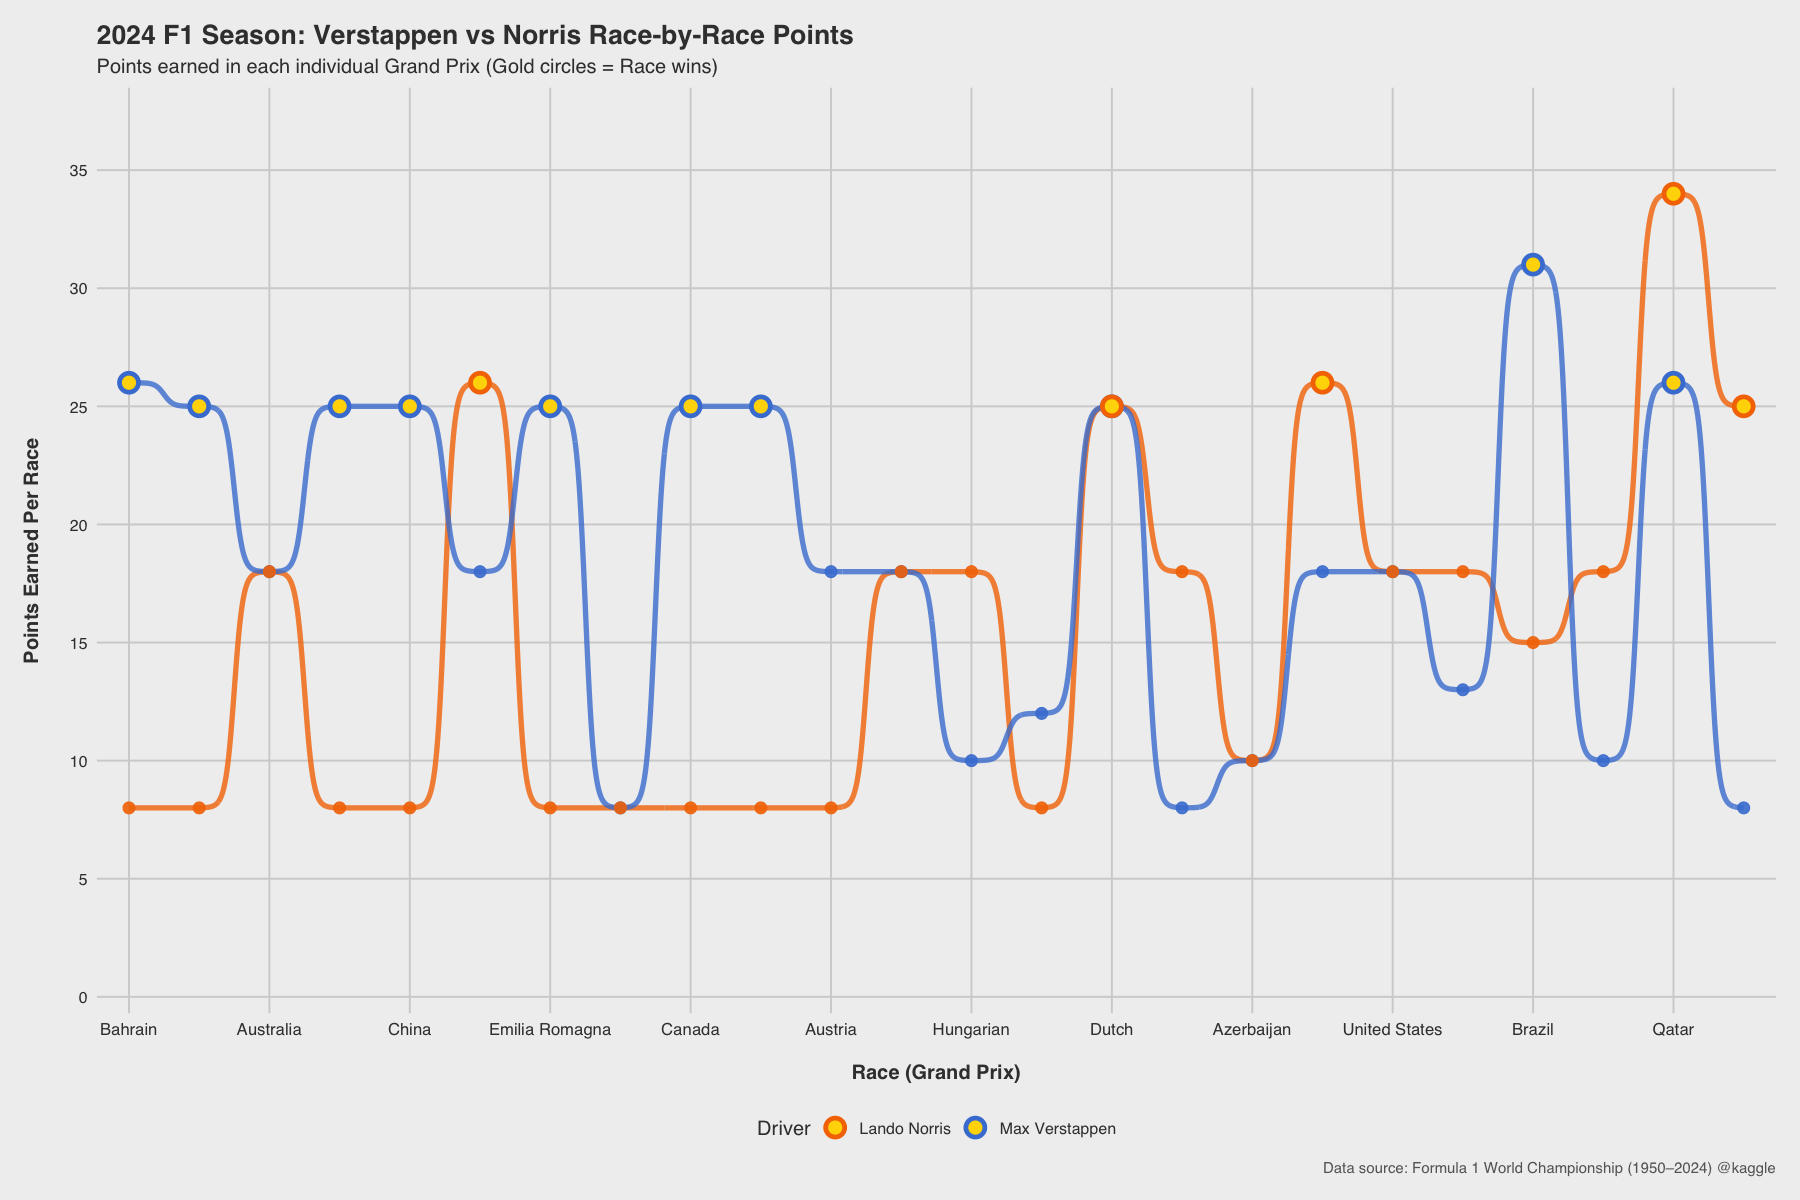

In [ ]:
points_comparison <- race_points_data %>%
  ggplot(aes(x = race, y = race_points, color = driver)) +
  geom_bump(size = 1.5, alpha = 0.8) +
  geom_point(size = 3, alpha = 0.9) +
  geom_point(
    data = race_points_data %>% filter(race_points >= 25),
    size = 4, shape = 21, fill = "gold", stroke = 2
  ) +
  scale_color_manual(values = team_colors, name = "Driver") +
  scale_x_continuous(
    breaks = seq(1, 24, 2),
    labels = race_points_data$grand_prix[seq(1, 24, 2)],
    expand = expansion(mult = c(0.02, 0.02))
  ) +
  scale_y_continuous(
    breaks = seq(0, 35, 5),
    limits = c(0, 35),
    expand = expansion(mult = c(0.02, 0.1))
  ) +
  labs(
    title = "2024 F1 Season: Verstappen vs Norris Race-by-Race Points",
    subtitle = "Points earned in each individual
    Grand Prix (Gold circles = Race wins)",
    x = "Race (Grand Prix)",
    y = "Points Earned Per Race",
    caption = "Data source: Formula 1 World Championship (1950–2024) @kaggle"
  ) +
  theme_fivethirtyeight() +
  theme(
    axis.title.x = element_text(
      margin = margin(t = 16),
      size = 12, face = "bold"
    ),
    axis.title.y = element_text(
      margin = margin(r = 16),
      size = 12, face = "bold"
    ),
    axis.text.x = element_text(size = 10),
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12),
    plot.caption = element_text(size = 9, color = "gray40")
  )

print(points_comparison)


In [ ]:
ggsave("Verstappen_Norris_Race_Points.png",
  points_comparison,
  width = 15, height = 10, dpi = 300
)
